In [1]:
using PyPlot

In [2]:
include("src/utils.jl")

rmse (generic function with 1 method)

# Prob 14.1 #

Given a function $\tilde{f} : \mathbf{R}^n \rightarrow \mathbf{R}$ and its corresponding classifier $\hat{f}(x) = \mathbf{sign}(\tilde{f}(x))$ we can define the RMS error over the data set as 

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^N \left(\tilde{f}(x_i) - y_i\right)^2$$

where $y_i \in \{-1,1\}$. Similarly, we can define the prediction error as 

$$err = \frac{1}{N} \sum_{i=1}^N \mathbf{1}\{\hat{f}(x_i) \ne y_i\}$$

As the graphs below show, we always have $\mathbf{1}\{\hat{f}(x_i) \ne y_i\} \le \left(\tilde{f}(x_i) - y_i\right)^2$ from which it follows immediately that 

$$err \le \sigma^2$$


In [3]:
x = linspace(-4,4, 1000);
indicator1 = (x .> 0);
indicator2 = (x .<0 );
squareError1 = (x + 1).^2;
squareError2 = (x - 1).^2;

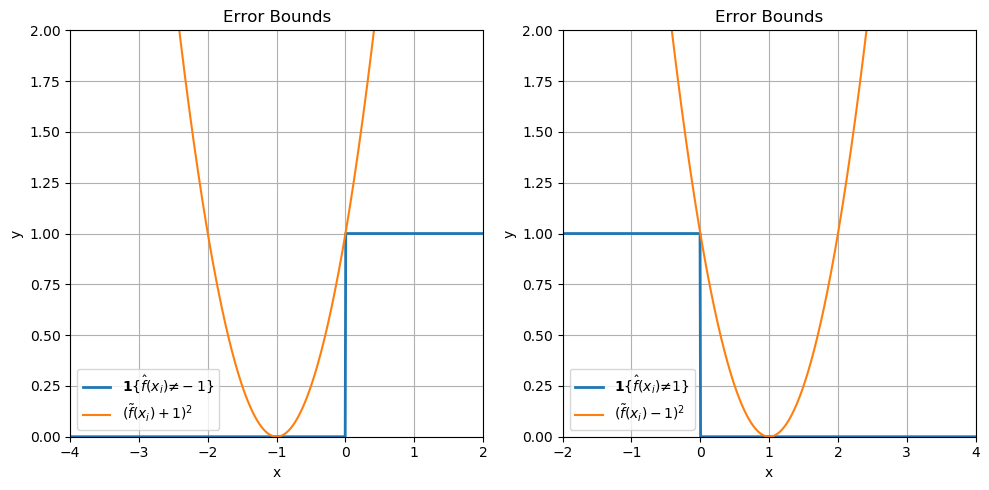

In [4]:
figure(figsize=(10,5))

subplot(121)
plot(x, indicator1, linewidth=2, label=L"$\mathbf{1}\{\hat{f}(x_i)\ne -1\}$");
plot(x, squareError1, label=L"$(\tilde{f}(x_i) + 1)^2$")
title("Error Bounds")
xlabel("x")
ylabel("y")
gca()[:set_xlim]([-4,2])
gca()[:set_ylim]([0,2])
grid(true);
legend();

subplot(122);
plot(x, indicator2, linewidth=2, label=L"$\mathbf{1}\{\hat{f}(x_i)\ne 1\}$");
plot(x, squareError2, label=L"$(\tilde{f}(x_i) - 1)^2$")
title("Error Bounds")
xlabel("x")
ylabel("y")
gca()[:set_xlim]([-2,4])
gca()[:set_ylim]([0,2])
grid(true);
legend();
tight_layout();

# Prob 14.2 #

The simplest classifier where the response variable is such that $y_i \in \{-2,-1,0,1,2\}$ is just a least squares classifier fit to the data. the prediction is then $\hat{y}_i = \arg \min |y_i - \hat{f}(x_i)|$

# Prob 14.5 #

In [5]:
x = linspace(-1,1, 2000);
y = 2* ((-0.5 .<= x .< 0.1) + (0.5 .<= x)) - 1;

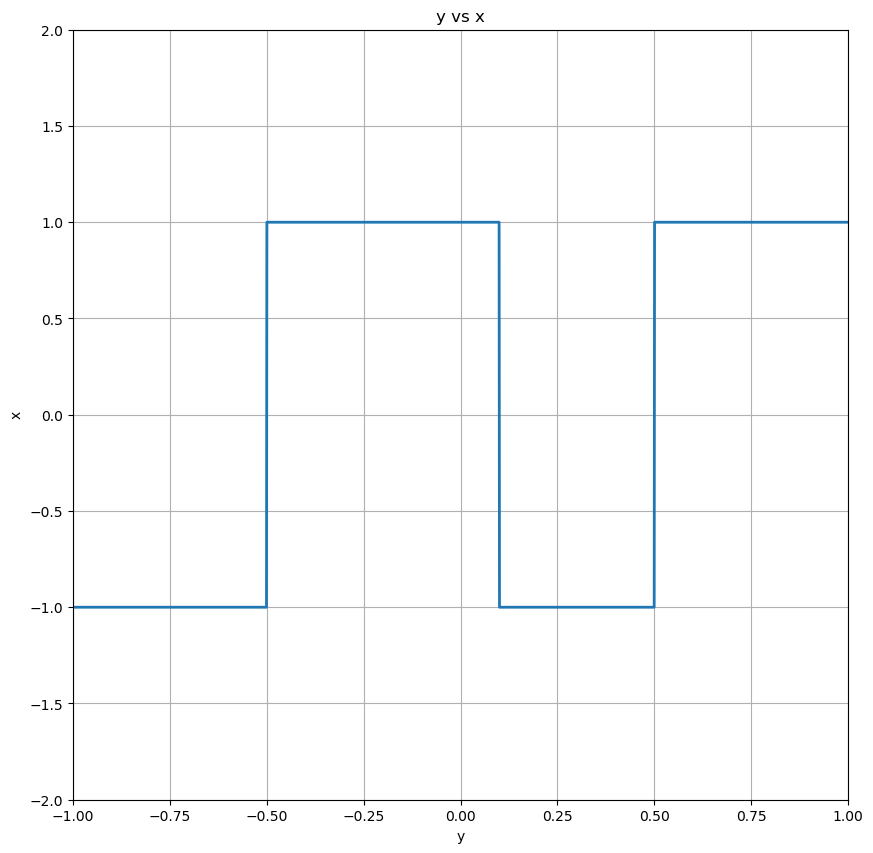

In [6]:
figure(figsize=(10,10));
plot(x, y, linewidth=2, label=L"$y$");
title("y vs x");
xlabel("y");
ylabel("x");
xlim([-1,1]);
ylim([-2,2]);
grid(true);

In [7]:
max_deg = 8;
rmse_train = zeros(max_deg + 1);
error_rate_train = zeros(max_deg + 1);

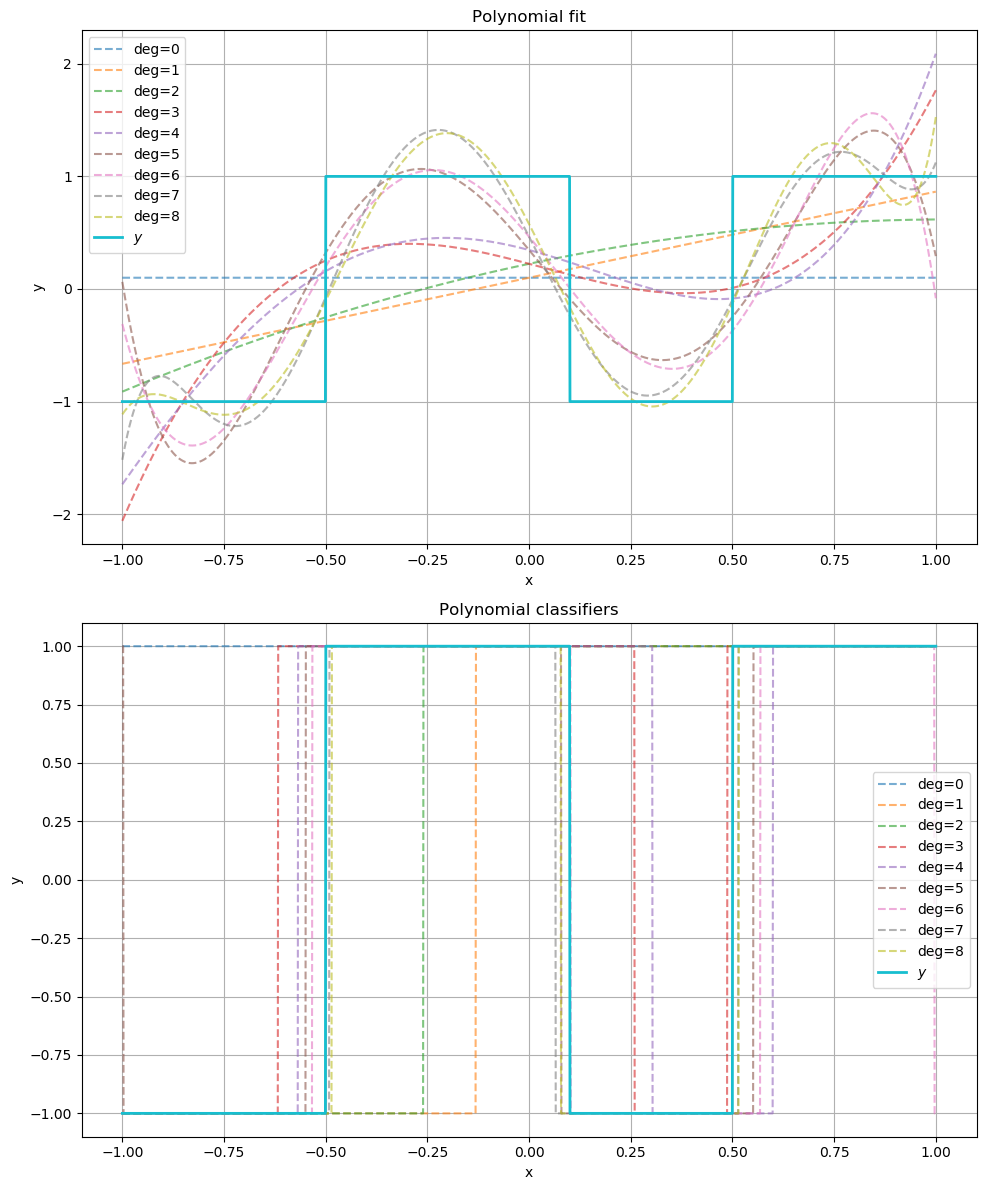

In [8]:
figure(figsize=(10,12))

for i = 0:max_deg
    A = vandermonde(x, i);
    theta = A \ y;

    pred = A * theta;
    binarized_pred = sign.(pred);
    
    subplot(211);
    plot(x, pred, "--", alpha=0.6, label=string("deg=", i));
    
    subplot(212);
    plot(x, binarized_pred, "--", alpha=0.6, label=string("deg=", i));

    rmse_train[i+1] = rmse(A * theta, y=y);
    error_rate_train[i+1] = mean(0.5 * abs.(binarized_pred - y));
end

subplot(211);
plot(x, y, linewidth=2, label=L"$y$");
legend();
grid(true);

title("Polynomial fit");
xlabel("x");
ylabel("y");
grid(true);

subplot(212);
plot(x, y, linewidth=2, label=L"$y$");
legend();
grid(true);

title("Polynomial classifiers");
xlabel("x");
ylabel("y");

tight_layout();

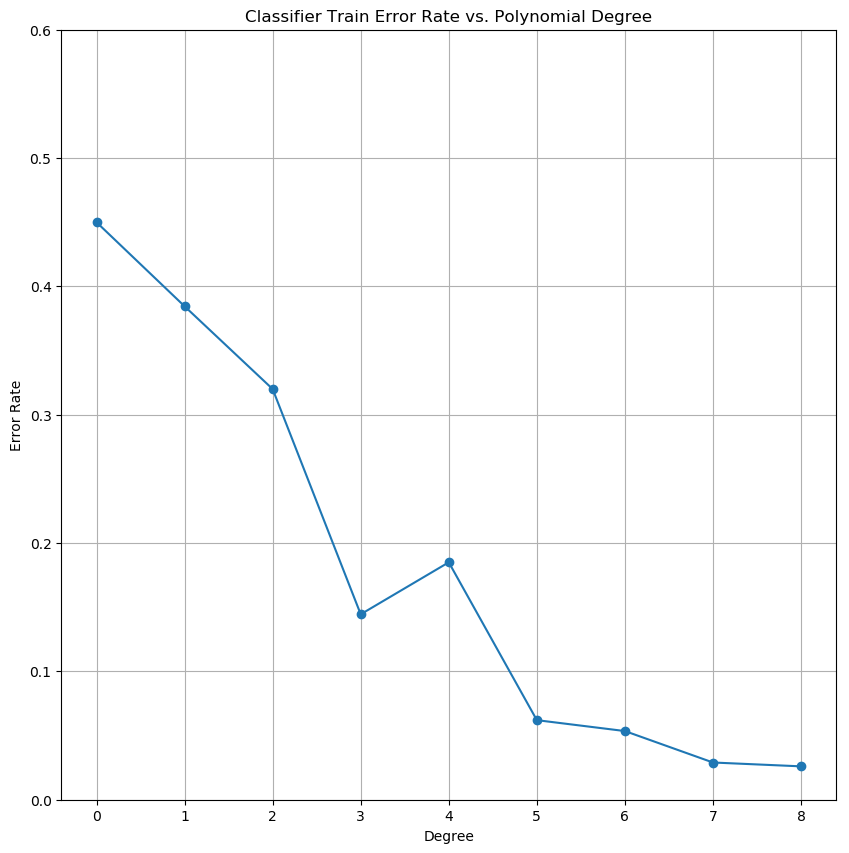

In [9]:
figure(figsize=(10,10));

plot(error_rate_train, marker="o");
grid(true);

title("Classifier Train Error Rate vs. Polynomial Degree");
xlabel("Degree");
ylabel("Error Rate");
ylim([0, 0.6]);


In [10]:
perfect_classifier = (x + 0.5) .* (x - 0.1) .* (x - 0.5);
A = vandermonde(x, 3);
theta = A \ y;
pred_deg3 = A * theta;

/Users/chaaland/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


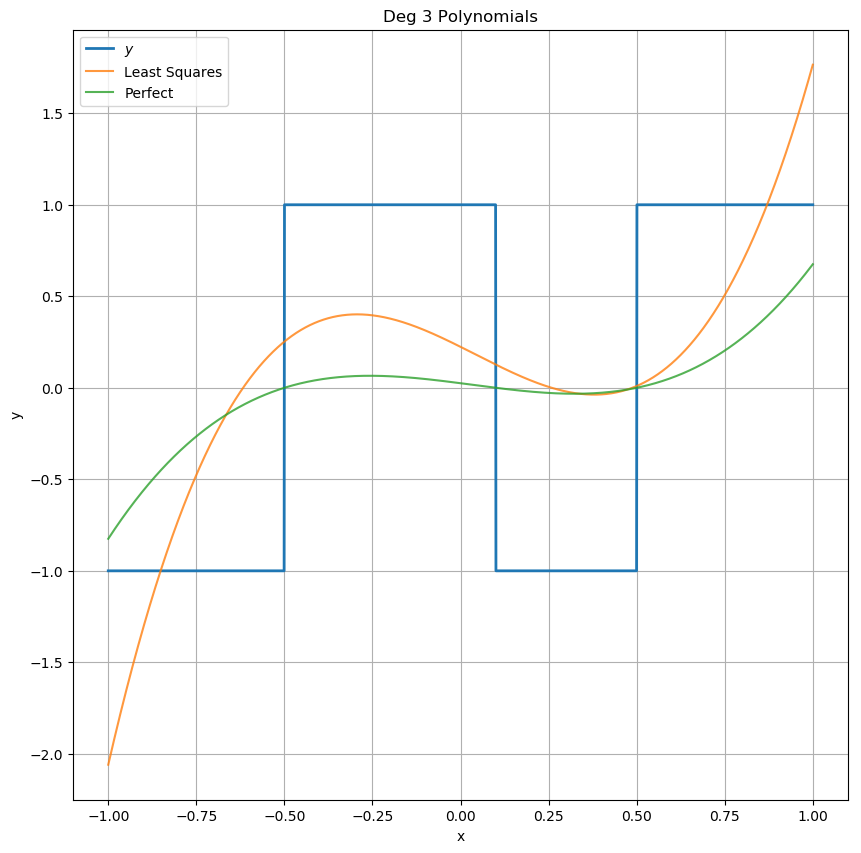

In [11]:
figure(figsize=(10,10))
plot(x, y, linewidth=2, label=L"$y$");
plot(x, pred_deg3, alpha=0.8, label="Least Squares");
plot(x, perfect_classifier, alpha=0.8, label="Perfect");
legend();
grid(true);

title("Deg 3 Polynomials");
xlabel("x");
ylabel("y");

# Prob 14.6 #

In [12]:
srand(1);
x1 = randn(200);
x2 = randn(200);
label = (x1 .* x2) .> 0;

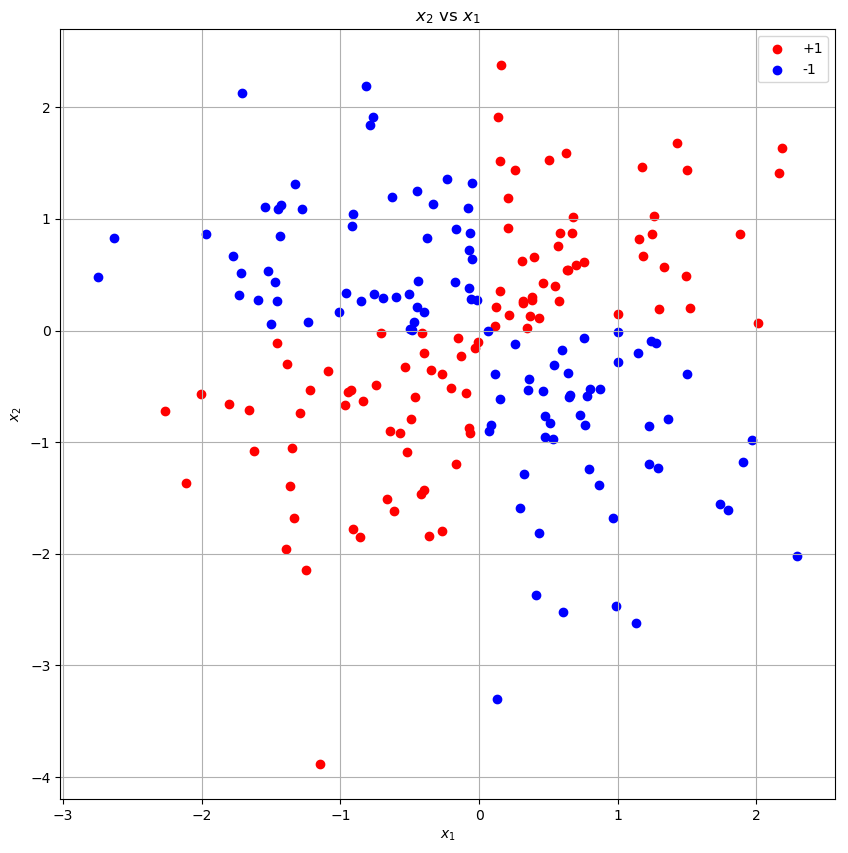

In [13]:
figure(figsize=(10,10))
scatter(x1[label], x2[label], color="red", label="+1");
scatter(x1[.!label], x2[.!label], color="blue", label="-1");

title(L"$x_2$ vs $x_1$");
xlabel(L"$x_1$");
ylabel(L"$x_2$");
legend();
grid(true);

In [14]:
A = hcat(ones(200), x1, x2, x1.^2, x1.*x2, x2.^2);
y = 2 * label - 1;
theta = A \ y;

pred = A * theta;
binarized_pred = sign.(pred);
error_rate = mean(0.5*abs.(binarized_pred - y));
println("Error Rate : $error_rate");
print("Optimal Polynomial fit has theta : $theta")

Error Rate : 0.05


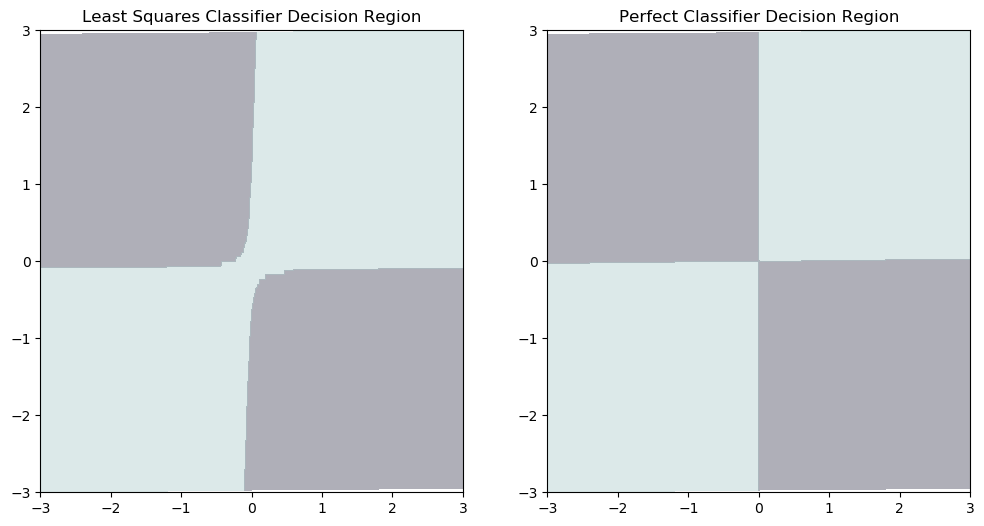

Optimal Polynomial fit has theta : [0.0153132, 0.0546497, 0.00922692, 0.00225764, 0.578075, -0.0179875]

In [15]:
n = 1000;
m = 100
t = linspace(-3,3, n);
x = repmat(t, m, 1);
y = reshape(repmat(t, 1, m)', m*n, 1);

A_plot = hcat(ones(m * n), x, y, x.^2, x.*y, y.^2);
pred = A_plot * theta;
binarized_pred = sign.(pred);

X = reshape(x, (n, m));
Y = reshape(y, (n, m));

figure(figsize=(12,6))
subplot(121);
contourf(X, Y, reshape(binarized_pred, (n, m)), 1, alpha=0.4, cmap="bone")
title("Least Squares Classifier Decision Region")

subplot(122);
contourf(X, Y, sign.(X.*Y), 1, alpha=0.4, cmap="bone");
title("Perfect Classifier Decision Region");
